In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns, numpy as np
from itertools import cycle, islice

In [4]:
# File to load
fdata="../Raw_Data/FakeDataSet.csv"

# Read the Data
f_data=pd.read_csv(fdata)
f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",89%,3754,10,18.3655%,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",45%,3339,9,90.2402%,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",29%,3363,2,53.6122%,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",77%,472,3,42.5692%,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",96%,3905,10,68.3412%,1121


In [5]:
 # Split up our data into groups based upon 'city'
#cities_groups = f_data.groupby('City')
#cities_groups.head(10)

In [6]:
f_data['Housing Growth'] = f_data['Housing Growth'].str.rstrip('%').astype('float')/100

f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",89%,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",45%,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",29%,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",77%,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",96%,3905,10,0.683412,1121


In [7]:
f_data['Crime Rate'] = f_data['Crime Rate'].str.rstrip('%').astype('float')/100

f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,"56,641,219",0.89,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,"20,020,427",0.45,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,"95,804,852",0.29,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,"35,812,244",0.77,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,"93,235,765",0.96,3905,10,0.683412,1121


In [8]:
f_data['Price'] = f_data['Price'].str.replace(',',"").astype('float')
f_data.head()

,UID,City,Zip,Lat,Long,Price,Crime Rate,Rent Price,School Ranking,Housing Growth,HOA
0,1,14,90334,34.104323,-118.124766,56641219.0,0.89,3754,10,0.183655,1054
1,2,12,90504,34.073326,-118.123124,20020427.0,0.45,3339,9,0.902402,852
2,3,7,90193,34.110011,-118.134588,95804852.0,0.29,3363,2,0.536122,225
3,4,7,90090,34.107751,-118.144764,35812244.0,0.77,472,3,0.425692,317
4,5,12,90155,34.080701,-118.138128,93235765.0,0.96,3905,10,0.683412,1121


In [9]:
#f_data.head()
#f_data.dtypes

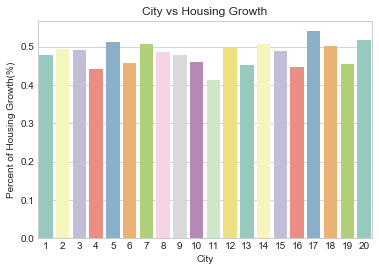

In [19]:
# group data by city and find the average housing growth for each cuty
housing_growth_df = f_data.groupby(["City"])['Housing Growth'].agg(['mean']).sort_index().reset_index()
housing_growth_df = housing_growth_df.rename(columns={"mean":"Housing_Growth_Avg"})

# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x="City", y="Housing_Growth_Avg", data=housing_growth_df, palette=sns.color_palette("Set3", 19))

plt.xlabel("City")
plt.ylabel("Percent of Housing Growth(%)")
plt.title("City vs Housing Growth")

plt.show()

# Save the figure
plt.savefig("../Clean_Data/Housing_Growth.png")

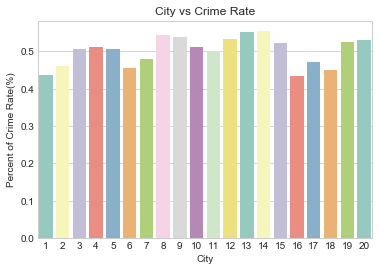

In [20]:
# group data by city and find the average housing growth for each cuty
crime_rate_df = f_data.groupby(["City"])['Crime Rate'].agg(['mean']).sort_index().reset_index()
crime_rate_df = crime_rate_df.rename(columns={"mean":"Crime_Rate_Avg"})

# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x="City", y="Crime_Rate_Avg", data=crime_rate_df, palette=sns.color_palette("Set3", 19))

plt.xlabel("City")
plt.ylabel("Percent of Crime Rate(%)")
plt.title("City vs Crime Rate")

plt.show()

# Save the figure
plt.savefig("../Clean_Data/Crime_Rate.png")

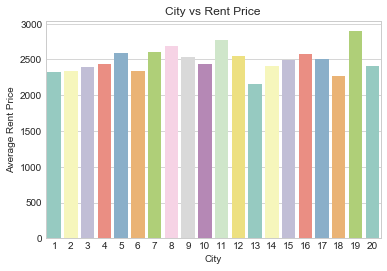

In [21]:
# group data by city and find the average housing growth for each cuty
rent_price_df = f_data.groupby(["City"])["Rent Price "].agg(['mean']).sort_index().reset_index()
rent_price_df = rent_price_df.rename(columns={"mean":"Rent_Price_Avg"})

# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x="City", y="Rent_Price_Avg", data=rent_price_df, palette=sns.color_palette("Set3", 19))

plt.xlabel("City")
plt.ylabel("Average Rent Price")
plt.title("City vs Rent Price")

plt.show()

# Save the figure
plt.savefig("../Clean_Data/Rent_Price.png")

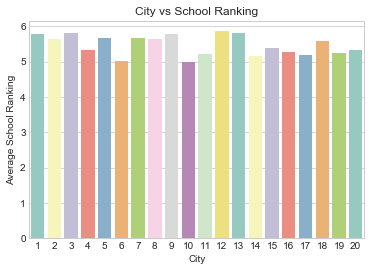

In [22]:
# group data by city and find the average housing growth for each cuty
school_ranking_df = f_data.groupby(["City"])["School Ranking "].agg(['mean']).sort_index().reset_index()
school_ranking_df = school_ranking_df.rename(columns={"mean":"School_Ranking_Avg"})

# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x="City", y="School_Ranking_Avg", data=school_ranking_df, palette=sns.color_palette("Set3", 19))

plt.xlabel("City")
plt.ylabel("Average School Ranking")
plt.title("City vs School Ranking")

plt.show()

# Save the figure
plt.savefig("../Clean_Data/School_Ranking.png")

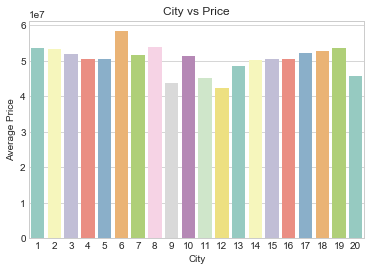

In [23]:
# group data by city and find the average housing growth for each cuty
price_df = f_data.groupby(["City"])["Price"].agg(['mean']).sort_index().reset_index()
price_df = price_df.rename(columns={"mean":"Price_Avg"})

# set the plot x_axis, y_axis, title and label 
sns.set_style("whitegrid")
sns.barplot(x="City", y="Price_Avg", data=price_df, palette=sns.color_palette("Set3", 19))

plt.xlabel("City")
plt.ylabel("Average Price")
plt.title("City vs Price")

plt.show()

# Save the figure
plt.savefig("../Clean_Data/Price.png")